In [18]:
#import libraries
import pandas as pd
import settings

Link = settings.PROCESSED_DIR
Link2 = settings.ASSEMBLED_DIR 

In [19]:
#  MERGE DATA- MODEL 1: Daily
# Temp_daily
Temp_daily_Max = pd.read_csv(Link + "\\" + 'Temp_daily_Max.csv')
Temp_daily_Min = pd.read_csv(Link + "\\" + 'Temp_daily_Min.csv')

#Merge1
Merge1 = pd.merge(left =Temp_daily_Max, right=Temp_daily_Min, how ="left", left_on= ['YEAR','MONTH', 'DAY', 'STATE'], right_on = ['YEAR','MONTH', 'DAY', 'STATE'])

# Demand_Daily
Demand_daily = pd.read_csv(Link + "\\" + 'Demand_Daily.csv')
#Merge2
Merge2 = pd.merge(left=Demand_daily, right=Merge1, how = "left", left_on= ['YEAR','MONTH', 'DAY', 'STATE'], right_on = ['YEAR','MONTH', 'DAY', 'STATE'])

# Holiday_Flag daily
Holiday_daily = pd.read_csv(Link + "\\" + 'Hoilidays.csv')
#Merge3
Merge3 = pd.merge(left=Merge2, right=Holiday_daily, how='left', left_on= ['YEAR','MONTH', 'DAY', 'STATE'], right_on = ['YEAR','MONTH', 'DAY', 'STATE'])

In [20]:
# # Weekend day flag
Merge3['DayOfWeek'] = pd.to_datetime(Merge3["DATE_x"]).dt.day_name(locale = 'English')

In [21]:
# # Put Holiday_Flag 0 for other values, put Weekend day flag
Merge3["Holiday_Flag"].fillna(0, inplace= True)
Merge3["Weekened_Flag"]= 0
Merge3.loc[Merge3['DayOfWeek'] == 'Saturday', 'Weekened_Flag'] = 1
Merge3.loc[Merge3['DayOfWeek'] == 'Sunday', 'Weekened_Flag'] = 1
Merge3.drop(['DayOfWeek', 'DATE_y'], axis='columns', inplace = True)

In [22]:
Merge3.describe()

,DAY,MONTH,YEAR,DEMAND,MAX_TEMP,MIN_TEMP,Holiday_Flag,Weekened_Flag
count,12571.000000,12571.000000,12571.000000,12571.000000,12568.000000,12568.000000,12571.000000,12571.000000
mean,15.712195,6.376342,2016.897065,206615.119181,21.251745,11.110757,0.045263,0.284146
std,8.812006,3.407401,1.951496,131080.607408,7.513166,6.762894,0.207888,0.451025
min,1.000000,1.000000,2014.000000,1053.270000,-2.100000,-14.200000,0.000000,0.000000
25%,8.000000,3.000000,2015.000000,59911.785000,16.063563,7.300000,0.000000,0.000000
50%,16.000000,6.000000,2017.000000,240256.590000,21.600000,11.400000,0.000000,0.000000
75%,23.000000,9.000000,2019.000000,307042.685000,26.800000,16.200000,0.000000,1.000000
max,31.000000,12.000000,2020.000000,520266.280000,46.600000,33.600000,1.000000,1.000000


In [23]:
# Null value replacement
Merge3.loc[(Merge3['MONTH'] == 10) & (Merge3['YEAR'] == 2020) & (Merge3['DAY'] == 16) & (Merge3['STATE'].isin(['SA', 'TAS', 'VIC'])), 'MAX_TEMP'] = Merge3[(Merge3['MONTH'] == 10) & (Merge3['YEAR'] == 2020) & (Merge3['DAY'] == 15) & (Merge3['STATE'].isin(['SA', 'TAS', 'VIC']))]['MAX_TEMP'].values
Merge3.loc[(Merge3['MONTH'] == 10) & (Merge3['YEAR'] == 2020) & (Merge3['DAY'] == 16) & (Merge3['STATE'].isin(['SA', 'TAS', 'VIC'])), 'MIN_TEMP'] = Merge3[(Merge3['MONTH'] == 10) & (Merge3['YEAR'] == 2020) & (Merge3['DAY'] == 15) & (Merge3['STATE'].isin(['SA', 'TAS', 'VIC']))]['MIN_TEMP'].values

In [24]:
# Inspectng data
Merge3.describe()

,DAY,MONTH,YEAR,DEMAND,MAX_TEMP,MIN_TEMP,Holiday_Flag,Weekened_Flag
count,12571.000000,12571.000000,12571.000000,12571.000000,12571.000000,12571.000000,12571.000000,12571.000000
mean,15.712195,6.376342,2016.897065,206615.119181,21.251606,11.111184,0.045263,0.284146
std,8.812006,3.407401,1.951496,131080.607408,7.513122,6.762971,0.207888,0.451025
min,1.000000,1.000000,2014.000000,1053.270000,-2.100000,-14.200000,0.000000,0.000000
25%,8.000000,3.000000,2015.000000,59911.785000,16.063563,7.300000,0.000000,0.000000
50%,16.000000,6.000000,2017.000000,240256.590000,21.600000,11.400000,0.000000,0.000000
75%,23.000000,9.000000,2019.000000,307042.685000,26.800000,16.200000,0.000000,1.000000
max,31.000000,12.000000,2020.000000,520266.280000,46.600000,33.600000,1.000000,1.000000


In [25]:
#Merge3.info
#Merge3.shape
Merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12571 entries, 0 to 12570
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DAY            12571 non-null  int64  
 1   DATE_x         12571 non-null  object 
 2   MONTH          12571 non-null  int64  
 3   YEAR           12571 non-null  int64  
 4   STATE          12571 non-null  object 
 5   DEMAND         12571 non-null  float64
 6   MAX_TEMP       12571 non-null  float64
 7   MIN_TEMP       12571 non-null  float64
 8   Holiday_Flag   12571 non-null  float64
 9   Weekened_Flag  12571 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


In [26]:
Merge3.isnull().sum()

DAY              0
DATE_x           0
MONTH            0
YEAR             0
STATE            0
DEMAND           0
MAX_TEMP         0
MIN_TEMP         0
Holiday_Flag     0
Weekened_Flag    0
dtype: int64

In [27]:
Merge3.duplicated().sum()

166

In [28]:
#Removing duplicates
df = Merge3.duplicated()
Merge3[df]
Merge3.drop_duplicates(inplace = True)
Merge3.YEAR.value_counts()

2016    1830
2015    1825
2014    1825
2019    1825
2018    1825
2017    1825
2020    1450
Name: YEAR, dtype: int64

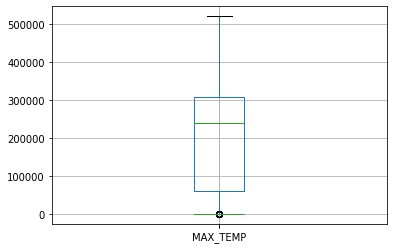

In [29]:
#Checking Outlier
Merge3.boxplot(column = ['DEMAND']) # No outliers
Merge3.boxplot(column = ['MAX_TEMP']) # No outliers

In [30]:
# Correlation Analysis
Merge3.corr()
Merge3.to_csv(Link2 + "\\Master_dataset.csv", index=False)

In [31]:
#Dummy variables for State
cols = ['STATE']
Merge3 =pd.get_dummies(Merge3, columns=cols, drop_first=True)

In [32]:
# Preparing Data for model
Model_df = Merge3[(Merge3.YEAR.isin([2014, 2015, 2016, 2017, 2018]))]
Test_df_2019 =Merge3[(Merge3.YEAR == 2019)] 
Test_df_2020 =Merge3[(Merge3.YEAR == 2020)] 

In [33]:
Model_df.to_csv(Link2 + "\\Model_data.csv", index=False)
Test_df_2019.to_csv(Link2 + "\\Test_data1.csv", index=False)
Test_df_2020.to_csv(Link2 + "\\Test_data2.csv", index=False)